# Assignment- Madhuri A

# Part A

   

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
## 1. Data Understanding & Exploration:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

In [ ]:
#A. Import ‘signal-data.csv’ as DataFrame. [2 Marks]

In [1]:
signal_df = pd.read_csv('signal-data.csv',na_values = ' ')
print(signal_df.shape)
signal_df.dtypes


NameError: name 'pd' is not defined

In [ ]:
Vehicle_Status  
Job_Type 
Default_hist  
Prop_List              
Region_Type
Credit_Inq  
Education_det
Marital_Stat 
Gen 
Credit_Lnks    
Income_Alt 
Day_Process
Ph.No 
Type_Loan  
Region
Addr_permanent
Permanent_Addr_tag 

In [3]:
signal_df.head(5)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
#B. Print 5 point summary and share at least 2 observations. [3 Marks]

In [4]:
signal_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


In [5]:
    print("Observations:")
    print("1.Feature 589 seem to have a lot of outliers and attribute distribution is right skewed. ")
    print("  It's 75% quartile is 114 and maximum is 737.")
    print("2. Similarly feature 4 also seems to have outliers as its 75% quartile is 1.5 and max value is 1114.5.")
    print("3. Features 0 to 5 and feature 589 have high standard deviation value. ")

Observations:
1.Feature 589 seem to have a lot of outliers and attribute distribution is right skewed. 
  It's 75% quartile is 114 and maximum is 737.
2. Similarly feature 4 also seems to have outliers as its 75% quartile is 1.5 and max value is 1114.5.
3. Features 0 to 5 and feature 589 have high standard deviation value. 


In [ ]:
#2. Data cleansing: [15 Marks]


In [ ]:
#A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [6]:
percent_feature_missing = signal_df.isnull().sum() * 100 / len(signal_df)
missing_data_value_df = pd.DataFrame({'column_name': signal_df.columns,
                                 'percent_missing': percent_feature_missing})
missing_data_value_df.percent_missing


#missing values  > 20% droping the columns
indexNames = missing_data_value_df[ missing_data_value_df['percent_missing'] >= .20 ].index
signal_df.drop(indexNames , inplace=True, axis=1)
signal_df.shape
#output: (1567, 254)



#imputing remaining columns with mean
signal_df.fillna(signal_df.mean(),inplace=True)



In [7]:
signal_df.shape

(1567, 254)

In [237]:
#B. Identify and drop the features which are having same value for all the rows. [3 Marks]

In [8]:

has_duplicates= signal_df.duplicated()

if True in has_duplicates.values:
    print('Duplicate exists in Dataframe')
else:
    print('No Duplicate exists in Dataframe')

No Duplicate exists in Dataframe


In [177]:
#C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]

In [9]:
corrMatrix = signal_df.corr()
corrMatrix

,8,9,10,11,12,13,14,15,16,17,...,577,582,583,584,585,586,587,588,589,Pass/Fail
8,1.000000,-0.152133,0.058386,-0.065065,0.005457,NaN,-0.085784,-0.065719,0.039571,-0.014963,...,0.010671,-0.027611,0.017390,0.019951,0.017925,0.010433,0.022845,0.026250,-0.022770,0.028016
9,-0.152133,1.000000,-0.064065,-0.008692,-0.065125,NaN,-0.004359,0.050226,-0.027492,-0.015672,...,0.030169,0.046209,-0.036036,-0.032583,-0.036109,0.033738,0.059301,0.060758,0.004880,-0.031191
10,0.058386,-0.064065,1.000000,-0.021358,-0.052534,NaN,-0.077850,-0.004057,-0.062439,-0.032645,...,0.029452,-0.073704,0.039060,0.039115,0.039447,0.000327,0.046965,0.046048,0.008393,0.033639
11,-0.065065,-0.008692,-0.021358,1.000000,-0.212828,NaN,0.064007,0.003347,-0.211808,0.793896,...,0.015892,0.015412,-0.013729,-0.017338,-0.014046,0.023005,-0.014900,-0.009667,0.015281,-0.032620
12,0.005457,-0.065125,-0.052534,-0.212828,1.000000,NaN,-0.012805,-0.033933,0.552542,-0.104559,...,0.031434,0.038282,0.000696,0.002081,0.000523,0.037056,-0.012258,-0.012759,-0.036720,-0.005969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.010433,0.033738,0.000327,0.023005,0.037056,NaN,-0.063512,-0.011120,-0.054480,0.015993,...,-0.002684,-0.016726,0.002257,0.001605,0.002743,1.000000,0.167913,0.164238,-0.486559,0.004156
587,0.022845,0.059301,0.046965,-0.014900,-0.012258,NaN,0.044234,0.016059,0.026357,-0.032242,...,-0.009405,-0.024473,-0.002649,-0.002498,-0.002930,0.167913,1.000000,0.974276,0.390813,0.035391
588,0.026250,0.060758,0.046048,-0.009667,-0.012759,NaN,0.036585,0.014375,0.028829,-0.021609,...,-0.015596,-0.020705,-0.002260,-0.001957,-0.002530,0.164238,0.974276,1.000000,0.389211,0.031167
589,-0.022770,0.004880,0.008393,0.015281,-0.036720,NaN,0.068161,0.009764,-0.013918,-0.013233,...,-0.024766,0.041486,-0.003008,-0.003295,-0.003800,-0.486559,0.390813,0.389211,1.000000,-0.002653


In [10]:

# By above correlation marix, 588 and 587 are stongly correlated by correlation value of .9742.
# Dropping Time column,we don't need this data from model predictions.
# Dropping 587 from the signal_df
# Dropping 589 ,as in seen in describe matrix above has 75% quartile range value 
# and maximum more than 5times apart.
signal_df.drop('Time' , inplace=True, axis=1)
signal_df.drop('587' , inplace=True, axis=1)
signal_df.drop('589' , inplace=True, axis=1)
signal_df.shape

(1567, 251)

In [11]:
signal_df.head(5)

,8,9,10,11,12,13,14,15,16,17,...,575,576,577,582,583,584,585,586,588,Pass/Fail
0,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,...,0.1026,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.005283,-1
1,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,...,0.0772,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.006000,-1
2,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,...,0.0640,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.014800,1
3,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,...,0.0525,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.004400,-1
4,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,...,0.0706,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.004400,-1


In [12]:
signal_df['Pass/Fail'].unique()

array([-1,  1])

In [26]:
#D. Check for multi-collinearity in the data and take necessary action. [3 Marks]

In [13]:
signal_df.rename(columns = {'Pass/Fail':'Target'}, inplace = True)

In [14]:
signal_df.head(5)

,8,9,10,11,12,13,14,15,16,17,...,575,576,577,582,583,584,585,586,588,Target
0,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,...,0.1026,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.005283,-1
1,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,...,0.0772,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.006000,-1
2,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,...,0.0640,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.014800,1
3,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,...,0.0525,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.004400,-1
4,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,...,0.0706,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.004400,-1


In [84]:
#!pip install collinearity

In [15]:
from collinearity import SelectNonCollinear

In [16]:
selector = SelectNonCollinear(0.4)

In [17]:
X = signal_df.iloc[:,0:250].values
y = signal_df.iloc[:,250].values 
selector.fit(X,y)
mask = selector.get_support()

In [18]:
df_selected_features = signal_df.drop('Target',axis=1)
selected_features = df_selected_features.columns
df2 = pd.DataFrame(X[:,mask],columns = np.array(selected_features)[mask])


In [20]:
#E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]

In [19]:
#creating a new dataframe with selected columns.
df2.shape
final_signal_df = df2
#df2.head(5)

In [20]:
#printing the final feature list selected
final_list_columns= df2.columns
final_list_columns

Index(['8', '9', '10', '11', '14', '15', '18', '20', '21', '23', '24', '25',
       '28', '33', '35', '37', '38', '43', '44', '47', '83', '86', '87', '88',
       '92', '93', '103', '104', '113', '114', '115', '116', '117', '119',
       '120', '144', '145', '147', '161', '162', '166', '168', '170', '171',
       '174', '175', '176', '180', '181', '182', '183', '221', '223', '227',
       '238', '239', '250', '255', '418', '419', '423', '424', '433', '460',
       '499', '500', '511', '542', '543', '558', '561', '570', '571', '575',
       '582', '583', '586', '588'],
      dtype='object')

In [21]:
#Since we have not dropped or changed the rows, joining the target column to the new dataset.
final_signal_df['Target'] = signal_df['Target'] 

In [22]:
final_signal_df.shape

(1567, 79)

In [23]:
final_signal_df.head(5)

,8,9,10,11,14,15,18,20,21,23,...,558,561,570,571,575,582,583,586,588,Target
0,1.5005,0.0162,-0.0034,0.9455,7.9558,414.8710,192.3963,1.4026,-5419.00,-4043.75,...,1.0344,42.3877,533.8500,2.1113,0.1026,0.5005,0.0118,0.021458,0.005283,-1
1,1.4966,-0.0005,-0.0148,0.9627,10.1548,414.7347,191.2872,1.3825,-5441.50,-3498.75,...,0.9634,18.1087,535.0164,2.4335,0.0772,0.5019,0.0223,0.009600,0.006000,-1
2,1.4436,0.0041,0.0013,0.9615,9.5157,416.7075,192.7035,1.4123,-5447.75,-4047.00,...,1.5021,24.7524,535.0245,2.0293,0.0640,0.4958,0.0157,0.058400,0.014800,1
3,1.4882,-0.0124,-0.0033,0.9629,9.6052,422.2894,192.1557,1.4011,-5468.25,-4515.00,...,1.1613,62.7572,530.5682,2.0253,0.0525,0.4990,0.0103,0.020200,0.004400,-1
4,1.5031,-0.0031,-0.0072,0.9569,10.5661,420.5925,191.6037,1.3888,-5476.25,-3987.50,...,0.9778,22.0500,532.0155,2.0275,0.0706,0.4800,0.4766,0.020200,0.004400,-1


In [ ]:
####3. Data analysis & visualisation: 

In [192]:

#A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. 


In [24]:
final_signal_df['Target'].value_counts()


-1    1463
 1     104
Name: Target, dtype: int64

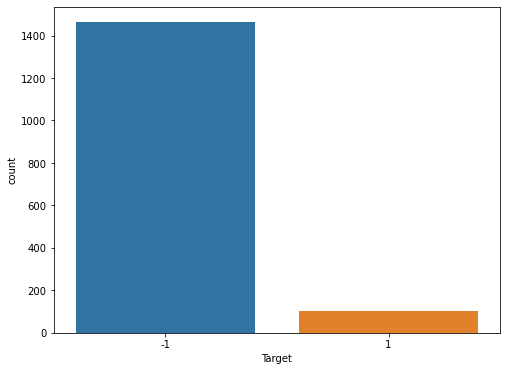

In [25]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Target", data=final_signal_df)
plt.show()

In [26]:
print("1. Target(Pass/fail) is attribute taking -1 and 1 values.")
print("Data is biased towards target value =-1 with 1463 datpoints.")

1. Target(Pass/fail) is attribute taking -1 and 1 values.
Data is biased towards target value =-1 with 1463 datpoints.


In [194]:
#B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks

In [ ]:
#Perform bivariate

<AxesSubplot:xlabel='Target', ylabel='11'>

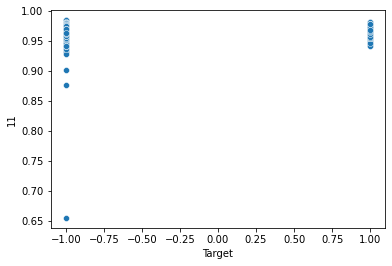

In [27]:
sns.scatterplot(final_signal_df['Target'], final_signal_df['11']) 

In [28]:
print("Observation: Feature 11 has  contributed almost equally to both Target values = 1 and -1. ")

Observation: Feature 11 has  contributed almost equally to both Target values = 1 and -1. 


<AxesSubplot:xlabel='Target', ylabel='8'>

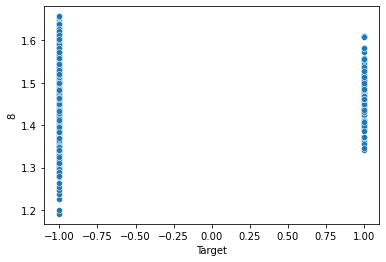

In [29]:
sns.scatterplot(final_signal_df['Target'], final_signal_df['8']) 

In [30]:
print("Observation: Feature 8 has contributed to datapoints with Target value -1  than Target values = 1. ")

Observation: Feature 8 has contributed to datapoints with Target value -1  than Target values = 1. 


<AxesSubplot:xlabel='Target', ylabel='570'>

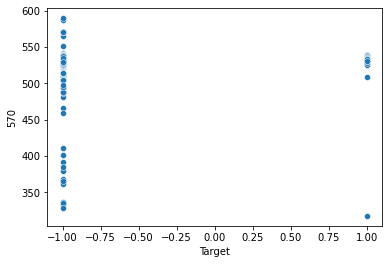

In [31]:
sns.scatterplot(final_signal_df['Target'], final_signal_df['570']) 

In [32]:
print("Observation: Feature 570 has contributed to datapoints with Target value -1  and very less datapoints with +1. ")

Observation: Feature 570 has contributed to datapoints with Target value -1  and very less datapoints with +1. 


In [155]:
#multivariate analysis

In [33]:
correlation = final_signal_df.corr()
correlation

,8,9,10,11,14,15,18,20,21,23,...,558,561,570,571,575,582,583,586,588,Target
8,1.000000,-0.152133,0.058386,-0.065065,-0.085784,-0.065719,-0.027687,-0.039324,0.017386,0.016255,...,-0.088217,0.006099,0.014597,0.079954,0.017209,-0.027611,0.017390,0.010433,0.026250,0.028016
9,-0.152133,1.000000,-0.064065,-0.008692,-0.004359,0.050226,-0.051984,0.008139,-0.001024,-0.072370,...,0.002975,0.022817,-0.031475,0.016960,0.036089,0.046209,-0.036036,0.033738,0.060758,-0.031191
10,0.058386,-0.064065,1.000000,-0.021358,-0.077850,-0.004057,-0.008480,0.005686,0.031808,-0.036071,...,0.018729,-0.004229,0.010503,-0.030882,0.023715,-0.073704,0.039060,0.000327,0.046048,0.033639
11,-0.065065,-0.008692,-0.021358,1.000000,0.064007,0.003347,-0.066279,0.012818,0.061917,-0.031341,...,0.022792,-0.004482,0.228537,-0.127335,-0.037895,0.015412,-0.013729,0.023005,-0.009667,-0.032620
14,-0.085784,-0.004359,-0.077850,0.064007,1.000000,0.133463,-0.001674,-0.009548,-0.034719,0.015729,...,0.008458,-0.023115,0.020110,0.022778,0.013565,-0.029463,0.002341,-0.063512,0.036585,-0.068975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,-0.027611,0.046209,-0.073704,0.015412,-0.029463,0.031174,0.049019,-0.017493,0.009947,0.034609,...,-0.034366,-0.039471,-0.042722,0.041564,0.045893,1.000000,-0.190090,-0.016726,-0.020705,0.047020
583,0.017390,-0.036036,0.039060,-0.013729,0.002341,0.018246,-0.001257,-0.011397,-0.002988,-0.002134,...,0.011913,0.023410,0.010110,0.006792,-0.021861,-0.190090,1.000000,0.002257,-0.002260,0.005981
586,0.010433,0.033738,0.000327,0.023005,-0.063512,-0.011120,0.089938,0.046852,0.057949,0.017676,...,0.027115,-0.012106,0.020544,-0.056391,-0.015340,-0.016726,0.002257,1.000000,0.164238,0.004156
588,0.026250,0.060758,0.046048,-0.009667,0.036585,0.014375,-0.039825,-0.017238,0.017867,0.009057,...,-0.001723,-0.014543,0.016478,-0.010000,-0.025009,-0.020705,-0.002260,0.164238,1.000000,0.031167


In [34]:
print("Observations:")
print("Since we have selected all non-collinear features, corr matrix values for all the columns are less than 1.")
print("They are negative linear correlation also between some features like 9 and 8,582 and 8.")

Observations:
Since we have selected all non-collinear features, corr matrix values for all the columns are less than 1.
They are negative linear correlation also between some features like 9 and 8,582 and 8.


In [ ]:
#4. Data pre-processing: 

In [35]:
#A. Segregate predictors vs target attributes. 

In [35]:
print("Target Attribute is final_signal_df's dataset column -'Target'")
print("We are using the selected features for the predictors as listed below.")
print("Below are predictor columns")
final_list_columns

Target Attribute is final_signal_df's dataset column -'Target'
We are using the selected features for the predictors as listed below.
Below are predictor columns


Index(['8', '9', '10', '11', '14', '15', '18', '20', '21', '23', '24', '25',
       '28', '33', '35', '37', '38', '43', '44', '47', '83', '86', '87', '88',
       '92', '93', '103', '104', '113', '114', '115', '116', '117', '119',
       '120', '144', '145', '147', '161', '162', '166', '168', '170', '171',
       '174', '175', '176', '180', '181', '182', '183', '221', '223', '227',
       '238', '239', '250', '255', '418', '419', '423', '424', '433', '460',
       '499', '500', '511', '542', '543', '558', '561', '570', '571', '575',
       '582', '583', '586', '588'],
      dtype='object')

In [36]:
#B. Check for target balancing and fix it if found imbalanced. [3 Marks]


negi_class: (1463, 79)
pos_class: (104, 79)
total target entries with -1 and 1: 
 -1    104
 1    104
Name: Target, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

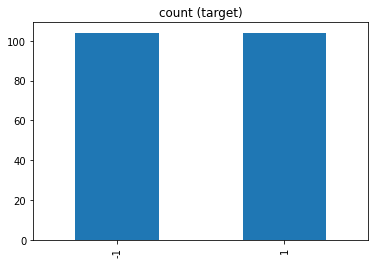

In [37]:
# Getting the class counts to balance the data using undersampling technique
negi_class_count, pos_class_count = final_signal_df['Target'].value_counts()

# Separate class
negi_class = final_signal_df[final_signal_df['Target'] == -1]
pos_class = final_signal_df[final_signal_df['Target'] == 1]
print('negi_class:', negi_class.shape)#more samples belong to class_0 4500
print('pos_class:', pos_class.shape)#no of sample in this class are 480

#There is imbalance in data using Undersampling to balance the data by sampling only 480 samples from class_0.
negi_class_under = negi_class.sample(pos_class_count)

balanced_signal_df = pd.concat([negi_class_under, pos_class], axis=0)#new balanced dataset with 480 records of each class

print("total target entries with -1 and 1: \n",balanced_signal_df['Target'].value_counts())# plot the count after under-sampeling
balanced_signal_df['Target'].value_counts().plot(kind='bar', title='count (target)')


In [ ]:
#C.. Perform train-test split and standardise the data or vice versa if required. [3 Marks]


In [38]:
X = balanced_signal_df.values[:,:78]  ## Features
y = balanced_signal_df.values[:,78] 

#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)


In [ ]:
#D. Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]

In [39]:
signal_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
8,1567.0,1.462862,0.073849,1.1910,1.41125,1.4616,1.51685,1.6564
9,1567.0,-0.000841,0.015107,-0.0534,-0.01080,-0.0013,0.00840,0.0749
10,1567.0,0.000146,0.009296,-0.0349,-0.00560,0.0004,0.00590,0.0530
11,1567.0,0.964353,0.012444,0.6554,0.95810,0.9658,0.97130,0.9848
12,1567.0,199.956809,3.255195,182.0940,198.13095,199.5371,202.00675,272.0451
...,...,...,...,...,...,...,...,...
584,1567.0,0.003847,0.003719,0.0017,0.00310,0.0036,0.00410,0.1045
585,1567.0,3.067826,3.576891,1.1975,2.30650,2.7577,3.29495,99.3032
586,1567.0,0.021458,0.012354,-0.0169,0.01345,0.0205,0.02760,0.1028
588,1567.0,0.005283,0.002866,0.0010,0.00330,0.0046,0.00640,0.0286


In [38]:
balanced_signal_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
8,208.0,1.468712,0.066811,1.3386,1.416700,1.46915,1.516500,1.6539
9,208.0,-0.000894,0.014397,-0.0362,-0.009800,-0.00095,0.007000,0.0383
10,208.0,0.000132,0.009522,-0.0269,-0.005125,0.00100,0.006025,0.0285
11,208.0,0.963806,0.009563,0.9416,0.956475,0.96510,0.970625,0.9825
14,208.0,8.765802,2.834194,2.2493,6.804875,8.94840,11.027750,17.8597
...,...,...,...,...,...,...,...,...
582,208.0,0.500404,0.003423,0.4915,0.498200,0.50040,0.502400,0.5088
583,208.0,0.014803,0.005969,0.0060,0.011275,0.01320,0.016250,0.0460
586,208.0,0.020823,0.011933,-0.0042,0.012200,0.02005,0.027575,0.0631
588,208.0,0.005450,0.002722,0.0015,0.003475,0.00500,0.006425,0.0151


In [40]:
print("Observations:")
print("1. Since orginal dataframe has a lot of collinear features, corr matrix values for respective columns were huge.")
print("2. As we have selected all non-collinear features using SelectNonCollinear object, corr matrix values for all the columns are less than 1 now.")
print("3. And we are using this dataset for training and testing with important features only.")

Observations:
1. Since orginal dataframe has a lot of collinear features, corr matrix values for respective columns were huge.
2. As we have selected all non-collinear features using SelectNonCollinear object, corr matrix values for all the columns are less than 1 now.
3. And we are using this dataset for training and testing with important features only.


In [ ]:
###5. Model training, testing and tuning:


In [ ]:
#A. Use any Supervised Learning technique to train a model. [2 Marks]

In [41]:
#Training the model on the balanced data using undersampling.
from sklearn.linear_model import LogisticRegression
X_bal_df = balanced_signal_df.drop(labels= "Target" , axis = 1)
Y_bal_df = balanced_signal_df["Target"]

X_train_bf, X_test_bf, Y_train_bf, Y_test_bf = train_test_split(X_bal_df, Y_bal_df, test_size=0.25, random_state=1)

# Fit the model on train
logreg_new = LogisticRegression(solver='lbfgs',random_state=1,max_iter=1000)
logreg_new.fit(X_train_bf, Y_train_bf)
#predict on test
y_predict_new = logreg_new.predict(X_test_bf)

model_score = logreg_new.score(X_test_bf, Y_test_bf)
print(model_score)


0.5576923076923077


In [134]:
#B. Use cross validation techniques. 

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [43]:
num_folds = 10

In [44]:
kfold = KFold(n_splits=num_folds)
results = cross_val_score(logreg_new,X_train_bf, Y_train_bf, cv=kfold)
results

array([0.5625    , 0.5625    , 0.6875    , 0.625     , 0.5625    ,
       0.6875    , 0.6       , 0.73333333, 0.66666667, 0.66666667])

In [45]:
print('Avearge Score: ', results.mean())
print('Standard deviation: ', results.std())


Avearge Score:  0.6354166666666667
Standard deviation:  0.05854870954076518


In [46]:
#using stratified kfold validation technique
k = 10
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k)
strat_results = cross_val_score(logreg_new, X_train_bf, Y_train_bf, cv = stratified_kfold)
strat_results

array([0.625     , 0.6875    , 0.5       , 0.6875    , 0.5       ,
       0.625     , 0.53333333, 0.8       , 0.66666667, 0.66666667])

In [47]:

print('Average Score: ', strat_results.mean())
print('Standard deviation: ', strat_results.std())

Average Score:  0.6291666666666668
Standard deviation:  0.09021579068482904


In [48]:
print('Observation:')
print("Accuracy scores of both techniques are varying by are 2-5% only.")

Observation:
Accuracy scores of both techniques are varying by are 2-5% only.


In [340]:
#C. Apply hyper-parameter tuning techniques to get the best accuracy. 

In [49]:
#Changing the solver method to tune the model
logreg2 = LogisticRegression(solver='newton-cg', random_state=1,max_iter=1000)

logreg2.fit(X_train_bf, Y_train_bf)

pred = logreg2.predict(X_test_bf)
tn, fp, fn, tp = confusion_matrix(Y_test_bf,pred).ravel()

lr_score = logreg2.score(X_test_bf, Y_test_bf)
lr_recall = round(tp/(tp+fn), 3)   
lr_precision = round(tp/(tp+fp), 3)  
lr_specificity =round(tn/(tn+fp),3)    

model_score = logreg2.score(X_test_bf, Y_test_bf)

print(model_score)
result = pd.DataFrame({'Model' : ['Logistic Regression'], 'Accuracy' : [lr_score], 'Precision' : [lr_precision],
                      'True positive rate(Recall)' : [lr_recall], 'True negative rate(Specificity)' : [lr_specificity],
                       'False positive rate' :  [1-lr_specificity]})
result

0.6153846153846154


,Model,Accuracy,Precision,True positive rate(Recall),True negative rate(Specificity),False positive rate
0,Logistic Regression,0.615385,0.63,0.63,0.6,0.4


In [64]:
print("Changing the solver, improved the performance by small margin.")

Changing the solver, improved the performance by small margin.


In [51]:
#tuning using GridSearchCV to find the best parameters on test data
model = LogisticRegression()
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'liblinear','saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test_bf, Y_test_bf)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:8

/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3

/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-pa

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also ref

/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iteration

/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-

/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/madhuri/opt/ana

Best: 0.598889 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.487778 (0.171158) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.598889 (0.227789) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.494444 (0.171504) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.594444 (0.235401) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.501111 (0.171590) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.591111 (0.204384) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.494444 (0.171504) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.587778 (0.226484) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.501111 (0.171590) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.578889 (0.207183) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.495556 (0.174214) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.587778 (0.226484) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.547778 (0.180264) with: {'C': 0.1, 'p

/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/madhuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [67]:
#D. Use any other technique/method which can enhance the model performance. 

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=1,max_depth= 4)

dt_model.fit(X_train_bf, Y_train_bf)

pred_decision_tree = dt_model.predict(X_test_bf)

tn, fp, fn, tp = confusion_matrix(Y_test_bf, pred_decision_tree).ravel()

dt_score = dt_model.score(X_test_bf, Y_test_bf)
dt_recall = round(tp/(tp+fn), 3)   
dt_precision = round(tp/(tp+fp), 3) 
dt_specificity =round(tn/(tn+fp),3)    

result.loc[2] = ['Decision Tree', dt_score, dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

,Model,Accuracy,Precision,True positive rate(Recall),True negative rate(Specificity),False positive rate
0,Logistic Regression,0.615385,0.63,0.630,0.60,0.40
2,Decision Tree,0.596154,0.65,0.481,0.72,0.28


In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)

rf.fit(X_train_bf, Y_train_bf)

pred_rm = rf.predict(X_test_bf)

tn, fp, fn, tp = confusion_matrix(Y_test_bf, pred_rm).ravel()

rf_score = rf.score(X_test_bf, Y_test_bf)
rf_recall = round(tp/(tp+fn), 3)   
rf_precision = round(tp/(tp+fp), 3)
rf_specificity =round(tn/(tn+fp),3) 

result.loc[3] = ['Random Forest', rf_score, rf_precision, rf_recall, rf_specificity, 1 - rf_specificity]
result

,Model,Accuracy,Precision,True positive rate(Recall),True negative rate(Specificity),False positive rate
0,Logistic Regression,0.615385,0.63,0.630,0.60,0.40
2,Decision Tree,0.596154,0.65,0.481,0.72,0.28
3,Random Forest,0.615385,0.64,0.593,0.64,0.36


In [ ]:
#E. Display and explain the classification report in detail. [3 Marks]

In [52]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_bf, pred))
print(classification_report(Y_test_bf, pred_decision_tree))
print(classification_report(Y_test_bf, pred_rm))

              precision    recall  f1-score   support

          -1       0.60      0.60      0.60        25
           1       0.63      0.63      0.63        27

    accuracy                           0.62        52
   macro avg       0.61      0.61      0.61        52
weighted avg       0.62      0.62      0.62        52

              precision    recall  f1-score   support

          -1       0.56      0.72      0.63        25
           1       0.65      0.48      0.55        27

    accuracy                           0.60        52
   macro avg       0.61      0.60      0.59        52
weighted avg       0.61      0.60      0.59        52

              precision    recall  f1-score   support

          -1       0.59      0.64      0.62        25
           1       0.64      0.59      0.62        27

    accuracy                           0.62        52
   macro avg       0.62      0.62      0.62        52
weighted avg       0.62      0.62      0.62        52



In [53]:
print("observations:")
print("Logistic Regression model has performed well than other two models.")
print("Precision and recall for both categories of target attribute, ie. -1 and 1 are equally comparable in this model.")
print("Also Recall for target value =1 is better than targetvalue =-1, which is the desired performance for the model.")
print("This model is doing well in identifying and predicting the actual required signal values of the device.")

observations:
Logistic Regression model has performed well than other two models.
Precision and recall for both categories of target attribute, ie. -1 and 1 are equally comparable in this model.
Also Recall for target value =1 is better than targetvalue =-1, which is the desired performance for the model.
This model is doing well in identifying and predicting the actual required signal values of the device.


In [ ]:
#F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]


In [54]:

from sklearn.svm import SVC

# Building a Support Vector Machine on train data with kernel ="rbf"
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train_bf, Y_train_bf)
prediction_svc = svc_model.predict(X_test_bf)

print('SVC accuracy',svc_model.score(X_test_bf, Y_test_bf))




SVC accuracy 0.5961538461538461


In [55]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
# Call Nearest Neighbour algorithm
NNH.fit(X_train_bf, Y_train_bf)

predicted_labels_NNH = NNH.predict(X_test_bf)

# evaluate accuracy
print('KNN Accuracy: ',accuracy_score(Y_test_bf, predicted_labels_NNH))


KNN Accuracy:  0.4423076923076923


In [56]:
NB_model = GaussianNB()
NB_model.fit(X_train_bf, Y_train_bf.ravel())
predicted_labels_NB = NB_model.predict(X_test_bf)
accuracy=accuracy_score(Y_test_bf, predicted_labels_NB)
print('NaiveBayes Accuracy: ',np.round(accuracy,2))
                

NaiveBayes Accuracy:  0.58


In [ ]:
#6. Post Training and Conclusion: 


In [ ]:
#A. Display and compare all the models designed with their train and test accuracies. [1 Marks]


In [57]:
print("Classification report for Logistic Regression Model : ")
print(classification_report(Y_test_bf, pred))
print("********************************************************")
print("Classification report for Decision Tree Model  : ")
print(classification_report(Y_test_bf, pred_decision_tree))
print("********************************************************")
print("Classification report for Randomforest classifier : ")
print(classification_report(Y_test_bf, pred_rm))
print("********************************************************")
print("Classification report for SVC : ")
print(classification_report(Y_test_bf, prediction_svc))
print("********************************************************")
print("Classification report for K-Nearest Neighbour : ")
print(classification_report(Y_test_bf, predicted_labels_NNH))
print("********************************************************")
print("Classification report for Gaussian NB classifier : ")
print(classification_report(Y_test_bf, predicted_labels_NB))

Classification report for Logistic Regression Model : 
              precision    recall  f1-score   support

          -1       0.60      0.60      0.60        25
           1       0.63      0.63      0.63        27

    accuracy                           0.62        52
   macro avg       0.61      0.61      0.61        52
weighted avg       0.62      0.62      0.62        52

********************************************************
Classification report for Decision Tree Model  : 
              precision    recall  f1-score   support

          -1       0.56      0.72      0.63        25
           1       0.65      0.48      0.55        27

    accuracy                           0.60        52
   macro avg       0.61      0.60      0.59        52
weighted avg       0.61      0.60      0.59        52

********************************************************
Classification report for Randomforest classifier : 
              precision    recall  f1-score   support

          -1       

In [ ]:
#B. Select the final best trained model along with your detailed comments for selecting this model. [1 Marks]


In [66]:
print("Logistic Regression model is the best model.")
print("'logreg2' has performed well w.r.t to precision and recall than other models built for the positive data points    (Target = +1).")
print("Recall was high for SVC as shown in above classification report,but precision is not as much as logistic regression model model.")

Logistic Regression model is the best model.
'logreg2' has performed well w.r.t to precision and recall than other models built for the positive data points    (Target = +1).
Recall was high for SVC as shown in above classification report,but precision is not as much as logistic regression model model.


In [ ]:
#C. Pickle the selected model for future use. [2 Marks]


In [61]:
import pickle

In [62]:
# # Save the trained model as a pickle string.
saved_model = pickle.dumps(logreg2)

In [63]:
# Load the pickled model
lg_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
lg_from_pickle.predict(X_test_bf)

array([ 1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
        1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,
        1])

In [ ]:
#D. Write your conclusion on the results. [1 Marks]

In [67]:
print("Using under sampling technique, we built a model to handle better all the positive datapoints of the device and make predictions. ")
print("Original dataset had outliers and correlated columns that were dropped and important non-collinear columns were only considered.")
print("On balanced dataset logistic regression algorithm based model performed well.")

Using under sampling technique, we built a model to handle better all the positive datapoints of the device and make predictions. 
Original dataset had outliers and correlated columns that were dropped and important non-collinear columns were only considered.
On balanced dataset logistic regression algorithm based model performed well.
